## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sqlite
import numpy as np

##  Database Connection

In [2]:
conn = sqlite.connect("database.sqlite")
cursor = conn.cursor()

In [3]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
table_list = [table[0] for table in cursor.fetchall()]

In [4]:
table_list

['station', 'status', 'trip', 'weather']

## Exploratory Data Analysis

In [5]:
sns.set_style("darkgrid")

### No. of Trips vs Hour

In [6]:
season = pd.read_sql_query("SELECT start_date, duration FROM trip", conn)
season["start_date"] = season["start_date"].str.replace("/","-")
season["start_date"] = pd.to_datetime(season["start_date"])
season["month"] = season["start_date"].dt.month
season["year"] = season["start_date"].dt.year
season["hour"] = season["start_date"].dt.hour

In [7]:
hour_trip = season
hour_trip.groupby("year")["hour"].value_counts()
hour_plot = hour_trip.groupby("year")["hour"].value_counts().to_frame()
hour_plot.reset_index(inplace=True)

In [8]:
hour_plot.set_index("year", inplace=True)

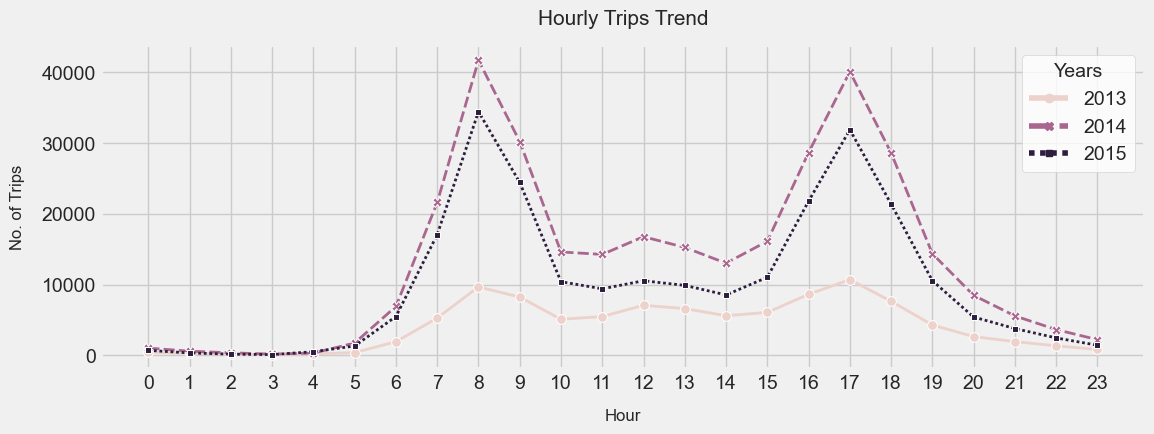

In [9]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(12,4))
plt.title("Hourly Trips Trend", fontsize=15, pad=15)

sns.lineplot(data=hour_plot, x="hour", y="count", hue = "year", style="year", linewidth=2, markers=True, markersize="7")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], labels = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"])

plt.ylabel("No. of Trips",fontsize=12, labelpad=12)
plt.xlabel("Hour",fontsize=12, labelpad=12)

plt.legend(frameon=True, title="Years", facecolor="white")

plt.show()

### No. of Trips vs Season

In [10]:
season["season"] = ""
data = [1,2,3,4,5,6,7,8,9,10,11,12]
season.loc[season["month"].isin([12,1,2]), "season"] = "Winter"
season.loc[season["month"].isin([3,4,5]), "season"] = "Spring"
season.loc[season["month"].isin([6,7,8]), "season"] = "Summer"
season.loc[season["month"].isin([9,10,11]), "season"] = "Fall"

In [11]:
season_plot = season.groupby("year")["season"].value_counts()
season_plot = season_plot.to_frame()
season_plot.reset_index(inplace=True)

C:\Users\sheer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


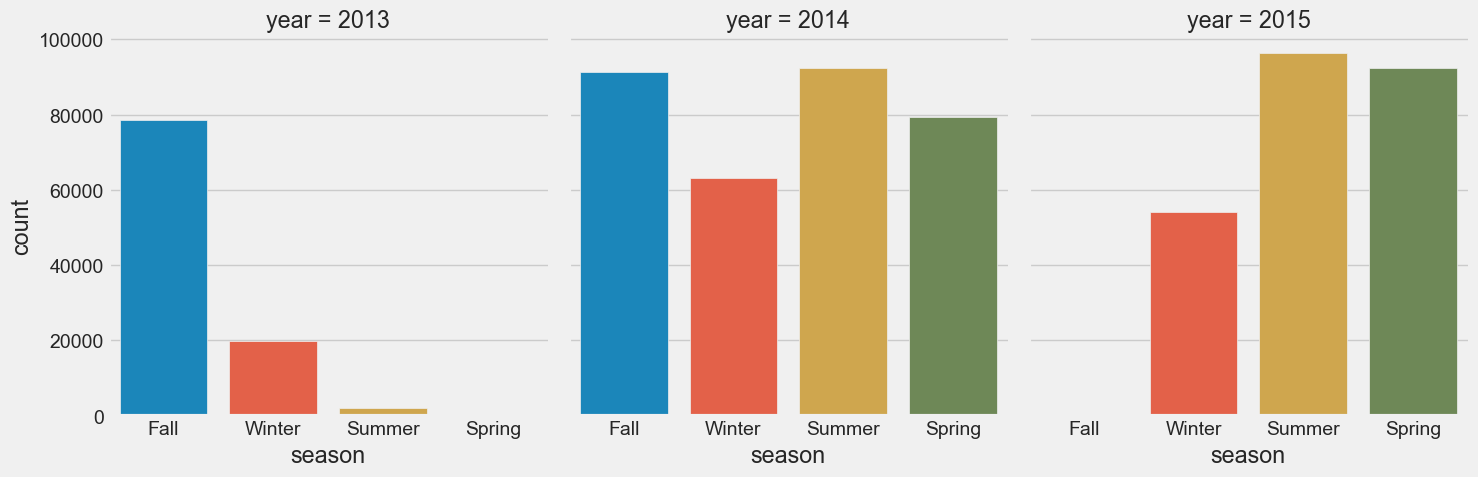

In [12]:
plt.style.use("fivethirtyeight")
sns.catplot(kind="bar", data=season_plot, x="season", y="count", col="year")

### Subscription Type Share

In [13]:
subscription = pd.read_sql_query("SELECT subscription_type FROM trip;",conn)

In [14]:
subscription_segment = subscription["subscription_type"].value_counts().to_frame()

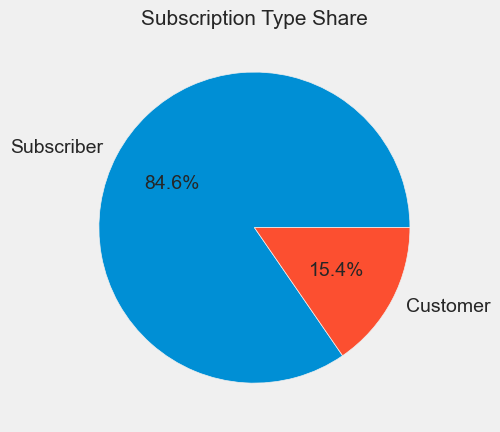

In [15]:
subscription_segment.plot(kind="pie", y="count", autopct="%1.1f%%")
plt.ylabel("")
plt.legend(labels=[], frameon=False)
plt.title("Subscription Type Share", fontsize=15)
plt.show()

## Trips vs Weather

In [16]:
weather = pd.read_sql_query("SELECT date, mean_temperature_f, mean_humidity, mean_visibility_miles, mean_wind_speed_mph, zip_code FROM weather",conn)

In [17]:
trips = pd.read_sql_query("SELECT trip.start_date, trip.start_station_name, trip.start_station_id, trip.end_station_name, trip.zip_code, station.city FROM trip LEFT JOIN station on trip.start_station_id = station.id;",conn)

In [18]:
trips["city"].value_counts()

city
San Francisco    603708
San Jose          37878
Mountain View     18167
Palo Alto          6773
Redwood City       3433
Name: count, dtype: int64

In [19]:
top_start_stations = trips["start_station_name"].value_counts().head(10).to_frame()

In [20]:
top_end_stations = trips["end_station_name"].value_counts().head(10).to_frame()

In [21]:
top_start_stations

,count
start_station_name,
San Francisco Caltrain (Townsend at 4th),49092
San Francisco Caltrain 2 (330 Townsend),33742
Harry Bridges Plaza (Ferry Building),32934
Embarcadero at Sansome,27713
Temporary Transbay Terminal (Howard at Beale),26089
2nd at Townsend,25837
Steuart at Market,24838
Market at Sansome,24172
Townsend at 7th,23724


In [22]:
top_end_stations

,count
end_station_name,
San Francisco Caltrain (Townsend at 4th),63179
San Francisco Caltrain 2 (330 Townsend),35117
Harry Bridges Plaza (Ferry Building),33193
Embarcadero at Sansome,30796
2nd at Townsend,28529
Market at Sansome,28033
Townsend at 7th,26637
Steuart at Market,25025
Temporary Transbay Terminal (Howard at Beale),23080


In [23]:
weather["date"] = weather["date"].str.replace("/","-")
weather["date"] = pd.to_datetime(weather["date"])

In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   3665 non-null   datetime64[ns]
 1   mean_temperature_f     3665 non-null   object        
 2   mean_humidity          3665 non-null   object        
 3   mean_visibility_miles  3665 non-null   object        
 4   mean_wind_speed_mph    3665 non-null   object        
 5   zip_code               3665 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 171.9+ KB


In [25]:
# trips = trips.drop("start", axis=1)
mapper = {"start_date":"date"}
trips.rename(columns = mapper, inplace=True)

In [26]:
trips["date"] = trips["date"].str.replace("/","-")
trips["date"] = pd.to_datetime(trips["date"])

In [27]:
trips["date"] = trips["date"].apply(lambda x: x.date())


In [28]:
trips["date"] = pd.to_datetime(trips["date"])

In [29]:
trips = trips.merge(weather, how="left", on="date")

In [30]:
temp_trips = trips["mean_temperature_f"].value_counts().to_frame()

In [31]:
temp_trips.reset_index(inplace=True)

In [32]:
temp_trips["mean_temperature_f"].replace("", pd.NA, inplace=True)
temp_trips["mean_temperature_f"] = temp_trips["mean_temperature_f"].astype(pd.Int64Dtype())

In [33]:
temp_trips.sort_values(by="mean_temperature_f", inplace=True)

In [34]:
temp_trips.dropna(inplace=True)

In [35]:
temp_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 39 to 43
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   mean_temperature_f  46 non-null     Int64
 1   count               46 non-null     int64
dtypes: Int64(1), int64(1)
memory usage: 1.1 KB


<Axes: xlabel='mean_temperature_f'>

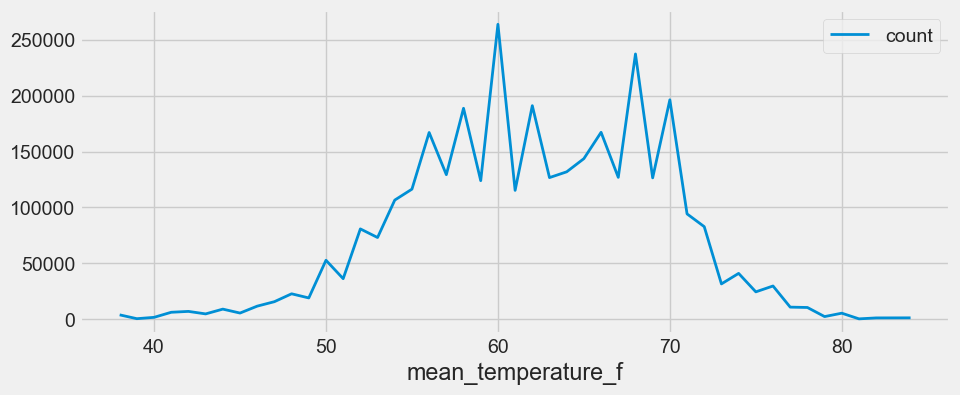

In [36]:
plt.rcParams['figure.figsize'] = (10, 4)
temp_trips.plot(kind="line", x="mean_temperature_f", y="count", linewidth=2)